In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

In [3]:
data=pd.read_excel('/content/gdrive/MyDrive/dataset1.xlsx')
dataset = pd.DataFrame(data)

In [5]:
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le_Gender=LabelEncoder()
le_CLASS=LabelEncoder()

In [8]:
dataset['Gender_n']= le_Gender.fit_transform(dataset['Gender'])
dataset['CLASS_n']= le_Gender.fit_transform(dataset['CLASS'])
dataset

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,Gender_n,CLASS_n
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0,0
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,1,0
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0,0
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0,0
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y,1,2
996,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y,1,2
997,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y,1,2
998,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y,1,2


In [10]:
from sklearn.model_selection import train_test_split
features=['Gender_n','AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
X=dataset[features]
y = data['CLASS_n']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)



In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5)
clf = clf.fit(X_train.values, y_train.values)

In [183]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [12]:
predictions = clf.predict(X_test.values)
clf.predict_proba(X_test.values)
predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.965

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions,labels=[0 ,2])

array([[ 18,   3],
       [  3, 164]])

In [15]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions,average='micro')


0.965

In [16]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions,average='micro')

0.965

In [17]:
import numpy as np
print("Unique classes in y_test:", np.unique(y_test))
print("Unique classes in predictions:", np.unique(predictions))


Unique classes in y_test: [0 1 2]
Unique classes in predictions: [0 1 2]


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,labels=[0,2],target_names=['Diabetic', 'Non_Diabetic']))


              precision    recall  f1-score   support

    Diabetic       0.86      0.86      0.86        21
Non_Diabetic       0.98      0.98      0.98       168

   micro avg       0.97      0.96      0.97       189
   macro avg       0.92      0.92      0.92       189
weighted avg       0.97      0.96      0.97       189



In [19]:
dataset1=dataset[features]
dataset1

,Gender_n,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


In [20]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = dataset1.columns).sort_values(0, ascending=False)
feature_importance

,0
HbA1c,0.739036
AGE,0.102558
BMI,0.066461
Chol,0.052426
TG,0.034965
HDL,0.004553
Gender_n,0.000000
Urea,0.000000
Cr,0.000000
LDL,0.000000


<Axes: >

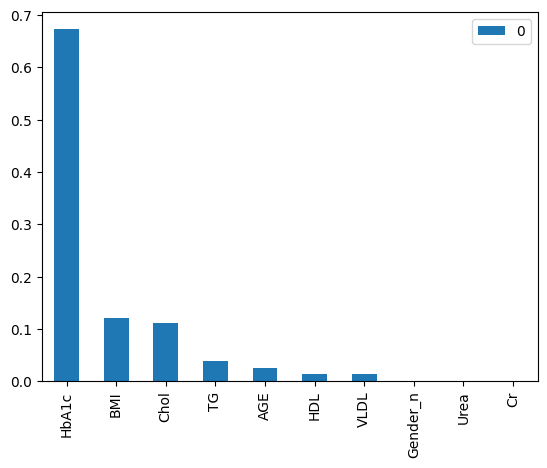

In [194]:
feature_importance.head(10).plot(kind='bar')

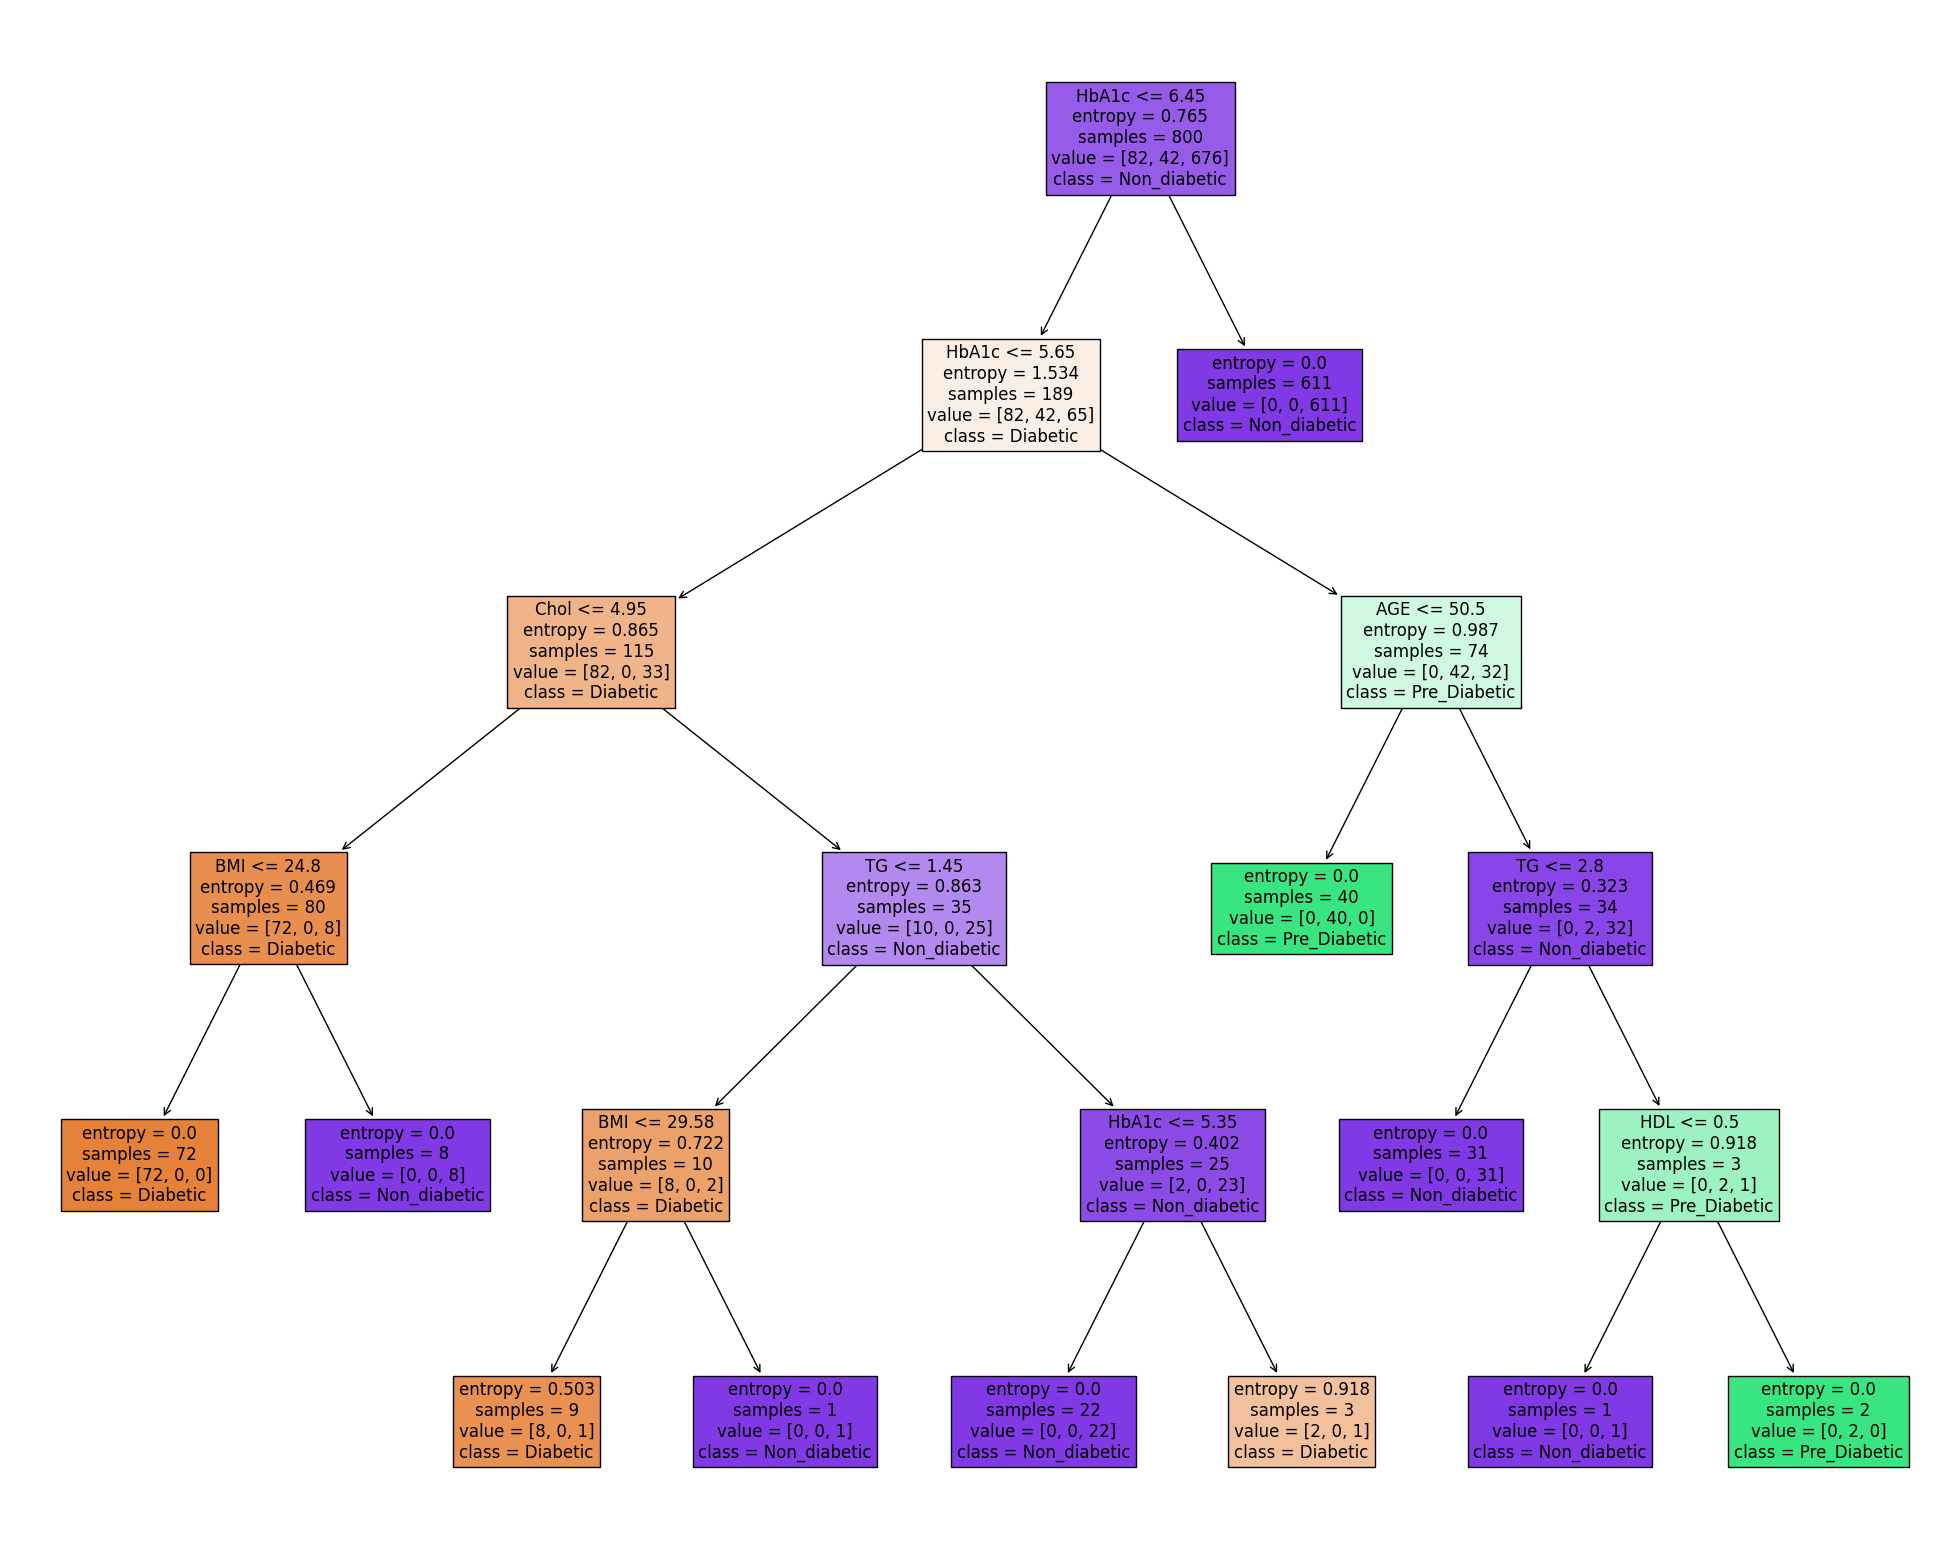

In [21]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=dataset1.columns,
                   class_names={0:'Diabetic', 1:'Pre_Diabetic',2:'Non_diabetic',3:'NA'},
                   filled=True,
                  fontsize=12)

In [22]:
clf.predict([[1,71,11.0	,97	,7.0,	7.5,	1.7,	1.2,	1.8,	0.6	,30.0]])

array([2])